In [1]:
import os
if not os.path.exists('yolov5'):
    !git clone https://github.com/ultralytics/yolov5
    %cd yolov5
    !pip install -r requirements.txt
else:
    %cd yolov5

/Users/lukekottom/Desktop/ML_personal_projects/ml_personal_projects/welding_YOLO/yolov5


In [2]:
import torch
from IPython.display import Image, display
import matplotlib.pyplot as plt
import cv2

In [3]:
model = torch.hub.load('yolov5', 'custom', path='yolov5s.pt', source='local')

YOLOv5 🚀 v7.0-348-g6deb2d75 Python-3.10.7 torch-2.3.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


image 1/1: 640x640 (no detections)
Speed: 17.6ms pre-process, 190.8ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)
Saved 1 image to runs/detect/exp3


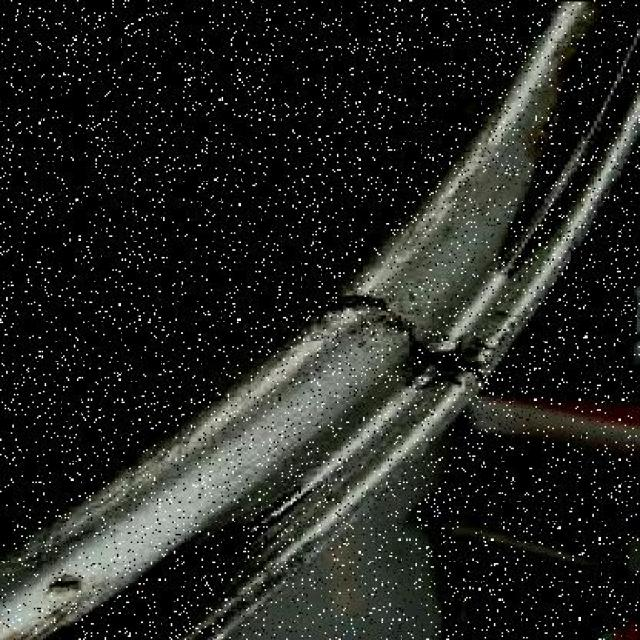

In [4]:
# Define function for inference
def run_inference(image_path):
    results = model(image_path)
    results.print()
    results.save()
    return results

# Example usage
image_path = '/Users/lukekottom/Desktop/ML_personal_projects/ml_personal_projects/welding_YOLO/train/images/0e538f39-1d30436c-c23_jpg.rf.3ce38b0e86b3cd83db06acc794de04f0.jpg'  # Replace with your image path
results = run_inference(image_path)

# Display results
Image(filename='/Users/lukekottom/Desktop/ML_personal_projects/ml_personal_projects/welding_YOLO/train/images/0e538f39-1d30436c-c23_jpg.rf.3ce38b0e86b3cd83db06acc794de04f0.jpg')

In [6]:
# Define the path to your data.yaml file
data_yaml_path = '/Users/lukekottom/Desktop/ML_personal_projects/ml_personal_projects/welding_YOLO/data.yaml'  # Replace with your path

# Train YOLOv5 model
!python3 train.py --img 640 --batch 16 --epochs 50 --data {data_yaml_path} --cfg yolov5s.yaml --weights yolov5s.pt --name weld_quality

# Check training results
%load_ext tensorboard
%tensorboard --logdir runs/train

train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=/Users/lukekottom/Desktop/ML_personal_projects/ml_personal_projects/welding_YOLO/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=weld_quality, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-348-g6deb2d75 Python-3.10.7 torch-2.3.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_

Reusing TensorBoard on port 6006 (pid 42216), started 0:06:49 ago. (Use '!kill 42216' to kill it.)